The goal of this notebook is to create a breaf interactive review for our midterm test (november 14).

If you spot something wrong (either in the theory or in the code) or have any suggestion please contact me: 201902335@fc.up.pt


# Table of contents

$1.\ Periodic\ Motion\ and\ the\ Complex\ Notation $

   * 1.1. Simple Harmonic oscillation
   
   * 1.2. Complex Notation

$2.\ Superposition\ of\ oscillations\ and\ Beats$

   * 2.1. Superposition of frequencies
   * 2.2. The Beats spetial case
   
$3.\ Damped\ Free\ Oscillations\ and\ the\ quality\ factor\ Q$
   * 3.1. Damped Oscillations
   * 3.2. Quality Factor
   
$4.\ Forced\ Oscillations\ and\ Resonance$
   
   * 4.1. Transient and Steady states
   * 4.2. Power
   * 4.3. Resonance
   
$5.\ Coupled\ Oscillators,\ Resonance\ Frequencies\ and\ Superposition\ of\ modes$
   
   * 5.1. Normal Modes
   * 5.2. Coupled Oscillators
   * 5.3. Resonance Frequencies of modes
   * 5.4. Superposition of N modes
   



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
sns.set(style="whitegrid")

# 1. 𝑃𝑒𝑟𝑖𝑜𝑑𝑖𝑐 𝑀𝑜𝑡𝑖𝑜𝑛 𝑎𝑛𝑑 𝑡ℎ𝑒 𝐶𝑜𝑚𝑝𝑙𝑒𝑥 𝑁𝑜𝑡𝑎𝑡𝑖𝑜𝑛

## 1.1. Simple Harmonic oscillation

We know that a simple harmonic oscillation is a phenomenum that can be describe by the following equation:

$X=X_0\cos(\omega t+\alpha)$  (1)

Where $X_0$ is the amplitude of the oscillation, $\omega$ is the angular frequênce and $\alpha$ is the phase angle. In that way, $X_0$ and $\alpha$ is determined by the initial conditions and $\omega$ is a characteristic of the system.



[]

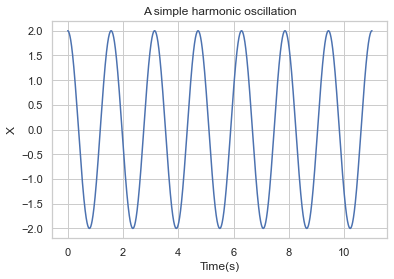

In [2]:
def harmonic_oscillation(X0,w,t,alpha):
    return X0*np.cos(w*t+alpha)

tempo = np.arange(0,11,0.0005)
xaxis = [harmonic_oscillation(2,4,t,0) for t in tempo]
plt.plot(tempo,xaxis)
plt.title("A simple harmonic oscillation")
plt.xlabel("Time(s)")
plt.ylabel("X")
plt.plot()

Imagine for example the famous "spring-mass" system, for now we will be considering that we have no dissipative force (so that the energy is conserved in the closed system).


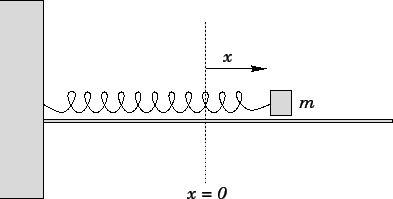

From the figure we can see that in equation (1) our Amplitude $X_0$ is defined by the difference of the initial position $x$ with respect to the equilibrium position.

To determine our $\omega$ factor we must solve the second order linear homogeneous diffential equation with constants coefficients which represents this system:

$mx''+kx=0$

Where $k$ is the spring constant, x'' is the aceleration and m is the object mass.

I assume that we all are familiarized with that equation, so we know that our solution is given by:

$\omega=\sqrt{\frac{k}{m}}$  and we can write the period as $T=\frac{2\pi}{\omega}$ and our linear frequency is given by $f=\frac{\omega}{2\pi}$

(in the case that the mass of the spring is negligible $m_s<<m_o$, otherwise $m=m_o+\frac{m_s}{3}$)

For now that is enough, we will have the opportunity to dive deepely in this topic later.

## 1.2. Complex Notation

As you saw we will have to work with a lot of cosines and sines to describe our harmonic oscillations, in order to make our life a lot easier I shall introduce the complex notation:

I will not derive the mathematical origins of that definition for obviously reason, but remember that if you are not comfortable with any concept of this notebook we hardly recommend that you review the professor notes and recorded classes.

without further ado a complex number $Z$ is defined as $Z=\cos\theta+j\sin\theta$ and we can rewrite it as:
$Z=e^{j\theta}$

So now we can write our harmonic oscillation equation in the complex form:
$X=X_0e^{j\omega t + \alpha}$

Where in this course we are interested in the real part of this complex number, which is given by $Re[X]=X_0\cos(\omega t + \alpha)$

I think you can already that will be much easier to work with complex notation so that we can take derivatives faster

# 2. 𝑆𝑢𝑝𝑒𝑟𝑝𝑜𝑠𝑖𝑡𝑖𝑜𝑛 𝑜𝑓 𝑜𝑠𝑐𝑖𝑙𝑙𝑎𝑡𝑖𝑜𝑛𝑠 𝑎𝑛𝑑 𝐵𝑒𝑎𝑡𝑠

## 2.1. Superposition of frequencies

Imagine that you have two distinct oscillations

$X_1=A_1\cos(\omega_1t)$ 

$X_2=A_2\cos(\omega_2t)$

What would happen if we sum them?

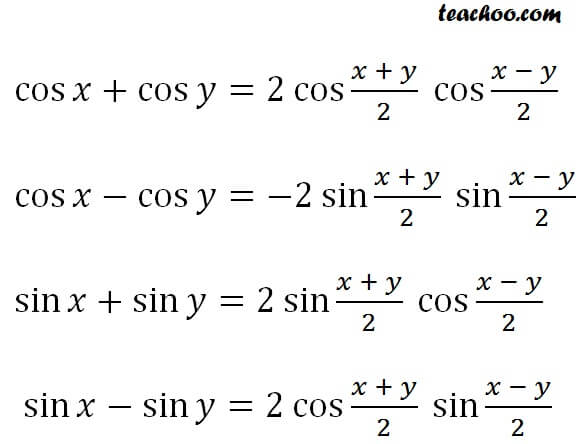

Using those properties we can write:

$X=X_1+X_2=2A\cos\frac{\omega_1+\omega_2}{2}t\cos\frac{\omega_1-\omega_2}{2}t$

We can have an infinity variation of superpositions, we can superposition oscillations with the same frequency or with different frequency in indeterminated quantities.

In the superposition of 2 perpendicular oscillations we can make a lot of diffent patterns depending in the ratio between the frequencies, between we could have $X_1=10\cos(5\pi t)$  and  $X_2=10\cos(10\pi t + \frac{\pi}{3})$ and the superposition of these frequencies can be seen in the following image:

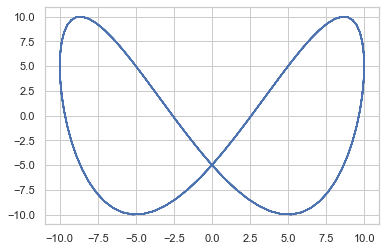

In [3]:
def x(t):
    return 10*math.cos(5*math.pi*t)

def yyy(t):
    return 10*math.cos(10*math.pi*t + (math.pi/3))

tempo = np.arange(0,2,0.005)

xaxis = [x(t) for t in tempo]
yyyaxis = [yyy(t) for t in tempo]
plt.plot(xaxis,yyyaxis)
plt.show()

However I think the most relevant case will be the one in which $\omega_1 \approx \omega_2$.

In a scenario like that, our superposition will result in a "beat", which is explored in the following section

## 2.2. The Beats spetial case

We will let you play with two different oscillations in order to understand the concept:

In [4]:
def beat_oscillation(A,w1,w2,t):
    return 2*A*np.cos(((w1+w2)/2)*t)*np.cos(((w1-w2)/2)*t)

In [5]:
def beat_interact(A,w1,w2,final_time):
    time = np.arange(0,final_time,0.005)
    osc = [beat_oscillation(A,w1,w2,t) for t in time]
    
    plt.plot(time,osc)
    plt.title('Beat Oscilation', fontweight='bold')
    plt.ylabel('X(t)')
    plt.xlabel('T(seconds)')
    plt.show()

interact(beat_interact, A=2,w1=(10*np.pi,15*np.pi,0.5),w2=(12*np.pi,17*np.pi,0.5),final_time=(0,20,1))   

interactive(children=(IntSlider(value=2, description='A', max=6, min=-2), FloatSlider(value=38.91592653589793,…

<function __main__.beat_interact(A, w1, w2, final_time)>

In [6]:



def beat_interact(A,w1,w2,final_time):
    time = np.arange(0,final_time,0.005)
    beat_osc = [beat_oscillation(A,w1,w2,t) for t in time]
    
    x1 = [(A*np.cos(w1*t)) for t in time]
    x2 = [(A*np.cos(w2*t)) for t in time]
    
    fig, axes = plt.subplots(1,2,figsize=(10, 5))  # Creating the subplot of each initial oscillation
    fig.suptitle('Initial Oscillation X1 and X2 respectively')
    axes[0].plot(time,x1)
    #axes[0].title("X1")
    #axes[0].xlabel("T(s)")
    #axes[0].ylabel(X(t))
    
    axes[1].plot(time,x2)
    #axes[1].title("X1")
    #axes[1].xlabel("T(s)")
    #axes[1].ylabel(X(t))
    
    #figs, axes = plt.subplots(1,1) # Creating the subplot of the beat oscillation
    
    plt.figure(figsize=(10,5))
    plt.plot(time,beat_osc)
    plt.title('Beat Oscilation', fontweight='bold')
    plt.ylabel('X(t)')
    plt.xlabel('T(s)')
    plt.show()

interact(beat_interact, A=2,w1=(0,15,0.5),w2=(0,25,0.5),final_time=(0,20,1))  

interactive(children=(IntSlider(value=2, description='A', max=6, min=-2), FloatSlider(value=7.0, description='…

<function __main__.beat_interact(A, w1, w2, final_time)>

# 3. 𝐷𝑎𝑚𝑝𝑒𝑑 𝐹𝑟𝑒𝑒 𝑂𝑠𝑐𝑖𝑙𝑙𝑎𝑡𝑖𝑜𝑛𝑠 𝑎𝑛𝑑 𝑡ℎ𝑒 𝑞𝑢𝑎𝑙𝑖𝑡𝑦 𝑓𝑎𝑐𝑡𝑜𝑟 𝑄

## 3.1. Damped Oscillations

Till now we were considering the perfect cases where there are no dissapative forces, but as you may know in the real world that is never the case.

So considering a disipative force F=-bv(uv), our differential equation becomes:

$mx''=-bx'-kx$ 

And we can writte it as:

$x''+\gamma x'+\omega_0^2x=0$

Where $\gamma=\frac{b}{m}$ e $\omega_0^2=\frac{k}{m}$

If we solve that differential equation, we will get:

$X(t)=Ae^{-\frac{\gamma}{2}t}cos(\omega t + \alpha)$

Where $\omega=\sqrt{\omega_0^2 - \frac{\gamma ^2}{4}}$


You can see a simple exemple of a damped oscillation in the following plot

In [7]:
def simp_damp(A,gam,w,t,alpha):    
    return A*np.exp(-(gam*t)/2)*np.cos(w*t+alpha)

TEM DUAS OPÇÕES, UMA EM FUNCAO DE W E OUTRA DE W0, O STRESS É DEFINIR OS REGIMES CRÍTICOS E SOBRE AMORTECIDOS... ESCOLHER A MELHOR DEPOIS

In [8]:
def damp_interact(A,gam,w,t,alpha,constrain):    
    time_interval = np.arange(0,t,0.01)
    xt = [simp_damp(A,gam,w,time_step,alpha) for time_step in time_interval]
    upper = [A*np.exp(-(gam*time_step)/2) for time_step in time_interval]
    lower = [-A*np.exp(-(gam*time_step)/2) for time_step in time_interval]
    
    plt.figure(figsize=(10,7))
    plt.title("Damped Oscillation",fontweight='bold')
    plt.plot(time_interval,xt,label="Oscilation")
    
    if constrain == 1:
        plt.plot(time_interval,upper,'--',color='r',label="Constrains")
        plt.plot(time_interval,lower,'--',color='r')
    plt.xlabel("t(s)")
    plt.ylabel("X(t)")
    plt.legend()
    plt.show()
    
    
    w0 = np.sqrt(w**2 + (gam**2)/4)
    Q = w0/gam
    N = Q/np.pi
    
    if w0 > gam/2:
        print("\033[1m REGIME SUB-AMORTECIDO:")
        print(f"\033[1m  wo = {round(w0,2)} s^-1")
        print(f"\033[1m  Fator de qualidade Q = {round(Q,2)}")
        print(f"\033[1m  Número de oscilações decaimento exp N = {round(N,2)}")
        
    if w0 == gam/2:
        print("\033[1m AMORTECIMENTO CRÍTICO")
        
    if w0 < gam/2:
        print("\033[1m REGIME SOBRE-AMORTECIDO")
    
    
interact(damp_interact, A=4,gam=(0.1,10,0.1),w=(-1,20,1),t=(0,30,1),alpha=0,constrain=(0,1,1))    

interactive(children=(IntSlider(value=4, description='A', max=12, min=-4), FloatSlider(value=5.0, description=…

<function __main__.damp_interact(A, gam, w, t, alpha, constrain)>

In [9]:
def damp_interact(A,gam,w0,t,alpha,constrain):    
    time_interval = np.arange(0,t,0.01)
    w = np.sqrt(w0**2 - gam**2/4)
    xt = [simp_damp(A,gam,w,time_step,alpha) for time_step in time_interval]
    upper = [A*np.exp(-(gam*time_step)/2) for time_step in time_interval]
    lower = [-A*np.exp(-(gam*time_step)/2) for time_step in time_interval]
    
    plt.figure(figsize=(10,7))
    plt.title("Damped Oscillation",fontweight='bold')
    plt.plot(time_interval,xt,label="Oscilation")
    
    if constrain == 1:
        plt.plot(time_interval,upper,'--',color='r',label="Constrains")
        plt.plot(time_interval,lower,'--',color='r')
    plt.xlabel("t(s)")
    plt.ylabel("X(t)")
    plt.legend()
    plt.show()
    
    
    Q = w0/gam
    N = Q/np.pi
    
    if w0 > gam/2:
        print("\033[1m REGIME SUB-AMORTECIDO:")
        print(f"\033[1m  wo = {round(w0,2)} s^-1")
        print(f"\033[1m  Fator de qualidade Q = {round(Q,2)}")
        print(f"\033[1m  Número de oscilações decaimento exp N = {round(N,2)}")
        
    if w0 == gam/2:
        print("\033[1m AMORTECIMENTO CRÍTICO")
        
    if w0 < gam/2:
        print("\033[1m REGIME SOBRE-AMORTECIDO")
    
    
interact(damp_interact, A=4,gam=(0.1,10,0.1),w0=(1,20,1),t=(0,30,1),alpha=0,constrain=(0,1,1))  

interactive(children=(IntSlider(value=4, description='A', max=12, min=-4), FloatSlider(value=5.0, description=…

<function __main__.damp_interact(A, gam, w0, t, alpha, constrain)>

## 3.2. Quality Factor

As you may have noticed in the above plots we also mentioned the quality factor Q and the exponentional decay N, 